In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
def check_df(dataframe, head=5):
    print('\033[1m' + '------------------ Shape ------------------' + '\033[0m')
    print(dataframe.shape)
    print('\033[1m' + '------------------ Types ------------------' + '\033[0m')
    print(dataframe.dtypes)
    print('\033[1m' + '------------------ Head ------------------' + '\033[0m')
    print(dataframe.head(head))
    print('\033[1m' + '------------------ Tail ------------------' + '\033[0m')
    print(dataframe.head(head))
    print('\033[1m' + '------------------ Sample ------------------' + '\033[0m')
    print(dataframe.sample(head))
    print('\033[1m' + '------------------ Columns ------------------' + '\033[0m')
    print(dataframe.columns)
    print('\033[1m' + '--------------- Unique Elements ---------------' + '\033[0m')
    print(dataframe.nunique())
    print('\033[1m' + '------------------ NA ------------------' + '\033[0m')
    print(dataframe.isnull().sum())
    print('\033[1m' + '------------------ Quantiles ------------------' + '\033[0m')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

------------------ Shape ------------------
(918, 12)
------------------ Types ------------------
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
------------------ Head ------------------
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1   49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2   37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3   48   F           ASY        1

In [5]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ['category', 'object', 'bool']]
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [6]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 5 and df[col].dtypes in ['int64', 'float64']]
num_but_cat

['FastingBS', 'HeartDisease']

In [7]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_car

[]

In [8]:
cat_cols = cat_cols + num_but_cat
cat_cols

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS',
 'HeartDisease']

In [9]:
colors = ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]

In [10]:
df.Age.describe().T

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

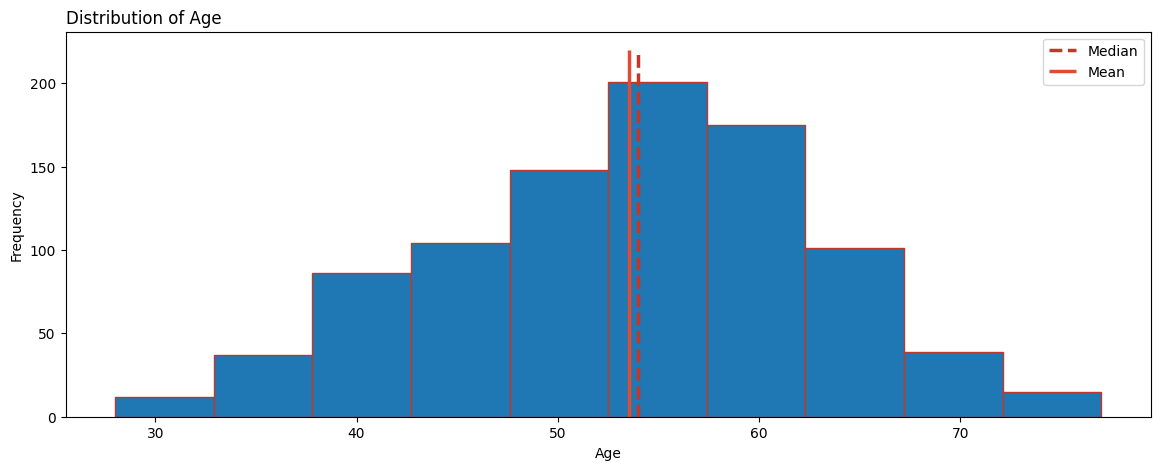

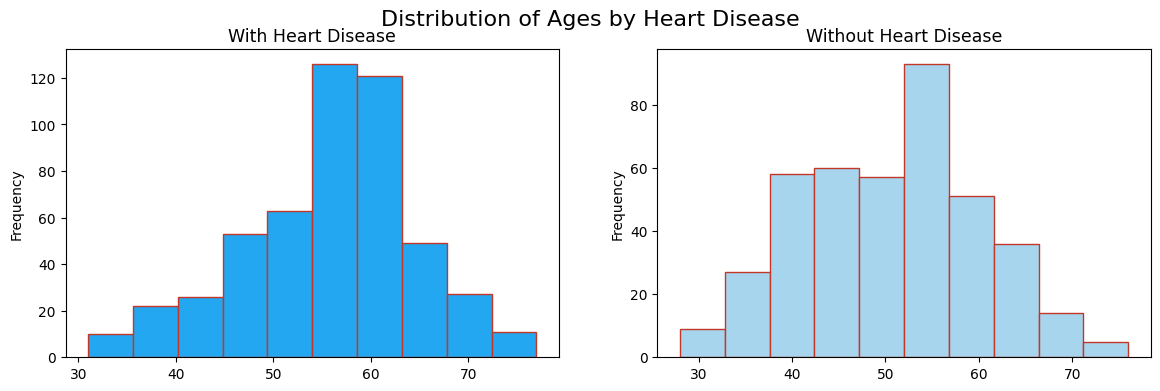

In [11]:
age_median = df.Age.median()
age_mean = df.Age.mean()

group = df.groupby(by='HeartDisease')
heart_disease = group.get_group(1)
without_heart_disease = group.get_group(0)

plt.figure(figsize=(14, 5))
plt.hist(df.Age, ec=colors[-1])
plt.vlines(age_median, ymin=0, ymax=220, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(age_mean, ymin=0, ymax=220, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age', loc='left')
plt.legend()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

ax1 = heart_disease['Age'].plot(kind='hist', ax=axs[0], ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)

ax2 = without_heart_disease['Age'].plot(kind='hist', ax=axs[1], ec=colors[-1], color=colors[3])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Distribution of Ages by Heart Disease', size=16, c='#000')
plt.show()

In [12]:
df.RestingBP.describe().T

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

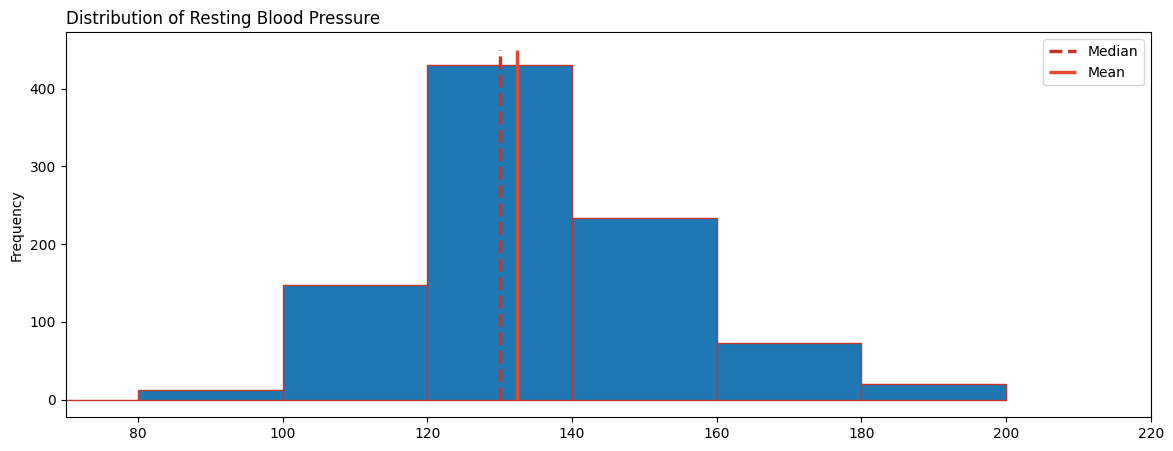

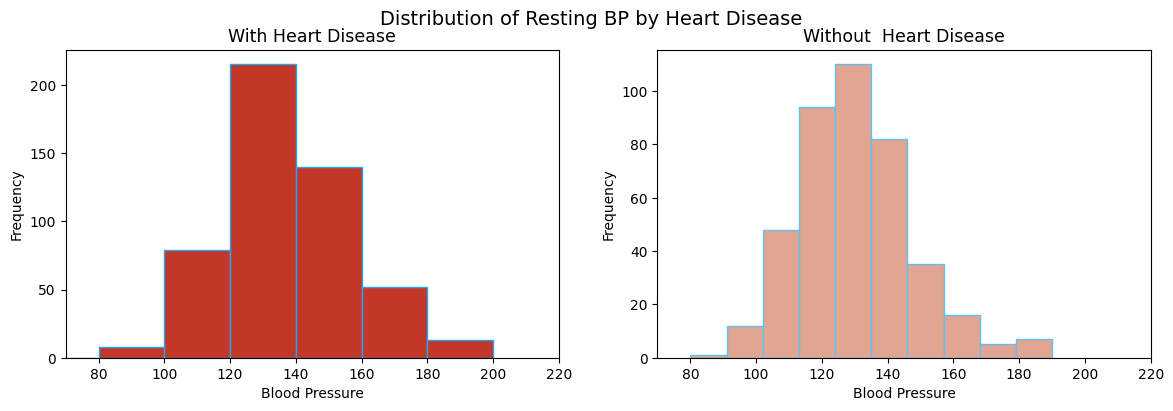

In [13]:
bp_median = df.RestingBP.median()
bp_mean = df.RestingBP.mean()

plt.figure(figsize=(14, 5))
plt.hist(df.RestingBP, ec=colors[-1])
plt.vlines(bp_median, ymin=-0.1, ymax=450, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(bp_mean, ymin=0, ymax=450, color=colors[-2], lw=2.5, label='Mean')

plt.xlim(70, 220)
plt.ylabel('Frequency')
plt.title('Distribution of Resting Blood Pressure', loc='left')
plt.legend()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = heart_disease['RestingBP'].plot(kind='hist', ax=axs[0], ec=colors[1], color=colors[-1])
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel('Blood Pressure')
ax1.set_xlim(70, 220)

ax2 = without_heart_disease['RestingBP'].plot(kind='hist', ax=axs[1], ec=colors[2], color=colors[5])
ax2.set_title('Without  Heart Disease', size=12.5)
ax2.set_xlabel('Blood Pressure')
ax2.set_xlim(70, 220)

fig.suptitle('Distribution of Resting BP by Heart Disease', size=14, c='#000')
plt.show()

In [14]:
df.Cholesterol.describe().T

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

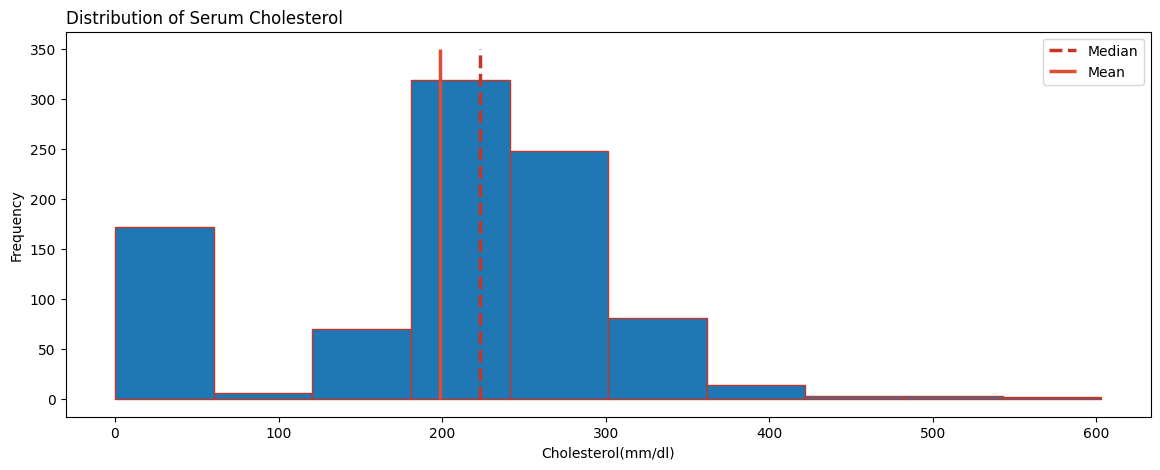

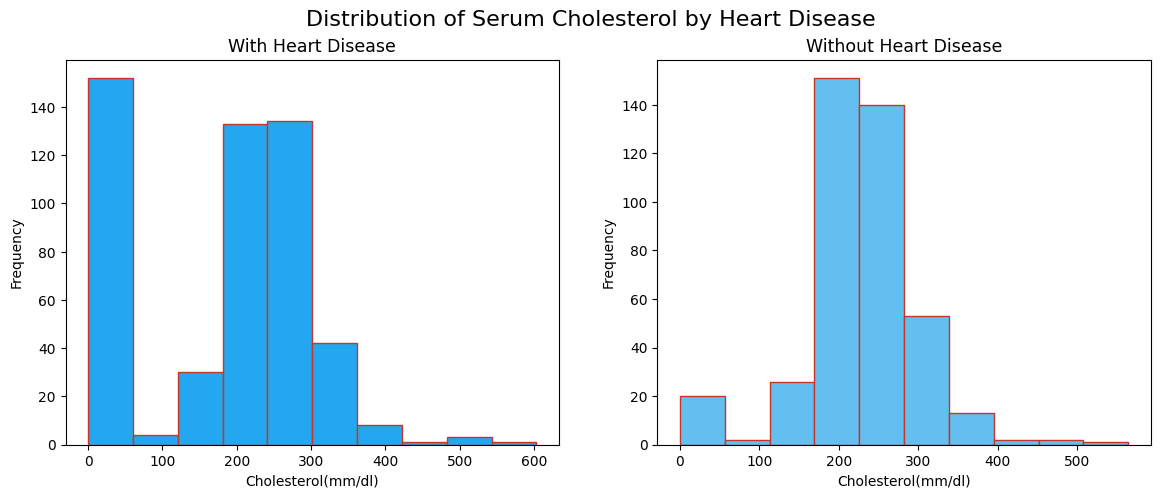

In [15]:
cholesterol_median = df.Cholesterol.median()
cholesterol_mean = df.Cholesterol.mean()

plt.figure(figsize=(14, 5))
plt.hist(df.Cholesterol, ec=colors[-1])
plt.vlines(cholesterol_median, ymin=-0.1, ymax=350, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(cholesterol_mean, ymin=0, ymax=350, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Cholesterol(mm/dl)')
plt.ylabel('Frequency')
plt.title("Distribution of Serum Cholesterol", loc='left')
plt.legend()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1 = heart_disease['Cholesterol'].plot(kind='hist', ax=axs[0], ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel('Cholesterol(mm/dl)')

ax2 = without_heart_disease['Cholesterol'].plot(kind='hist', ax=axs[1], ec=colors[-1], color=colors[2])
ax2.set_title('Without Heart Disease', size=12.5)
ax2.set_xlabel('Cholesterol(mm/dl)')

fig.suptitle('Distribution of Serum Cholesterol by Heart Disease', size=16, c='#000')
plt.show()

In [16]:
df.groupby(by=['FastingBS']).count()['HeartDisease']

FastingBS
0    704
1    214
Name: HeartDisease, dtype: int64

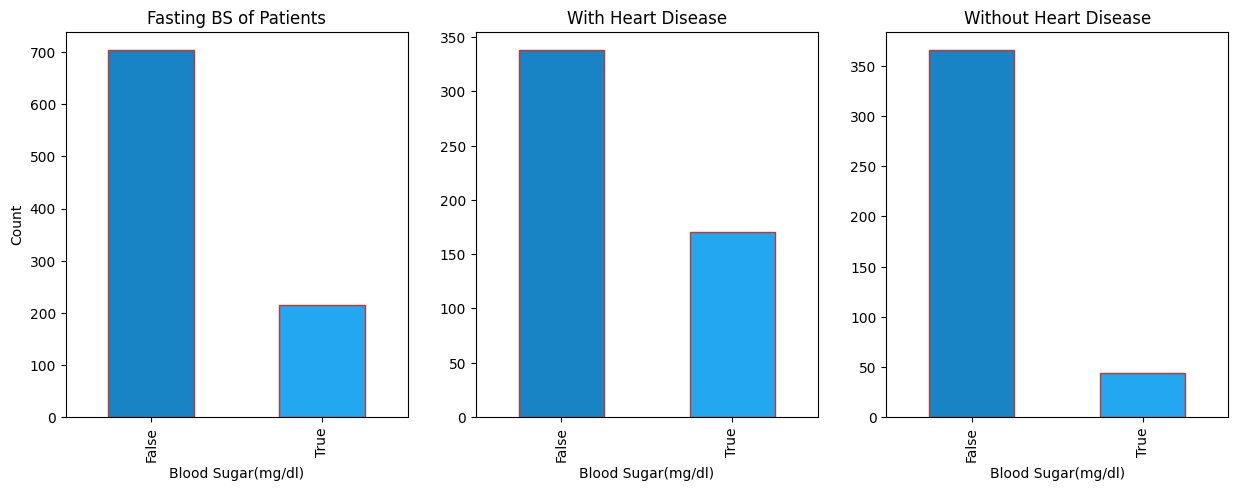

In [17]:
a = heart_disease['FastingBS'].value_counts()
a.rename(index={0: 'False', 1: 'True'}, inplace=True)
b = without_heart_disease['FastingBS'].value_counts()
b.rename(index={0: 'False', 1: 'True'}, inplace=True)

df_ = df.groupby(by=['FastingBS']).count()['HeartDisease']
df_.rename(index={0: 'False', 1: 'True'}, inplace=True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1 = df_.plot(kind='bar', ax=axs[0], color=colors[0:2], ec=colors[-1])
ax1.set_xlabel('Blood Sugar(mg/dl)')
ax1.set_ylabel('Count')
ax1.set_title("Fasting BS of Patients")

ax2 = a.plot(kind='bar', ax=axs[1], color=colors[0:2], ec=colors[-1])
ax2.set_xlabel('Blood Sugar(mg/dl)')
ax2.set_title("With Heart Disease")

ax3 = b.plot(kind='bar', ax=axs[2], color=colors[0:2], ec=colors[-1])
ax3.set_xlabel('Blood Sugar(mg/dl)')
ax3.set_title("Without Heart Disease")
plt.show()

In [18]:
df.MaxHR.describe().T

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

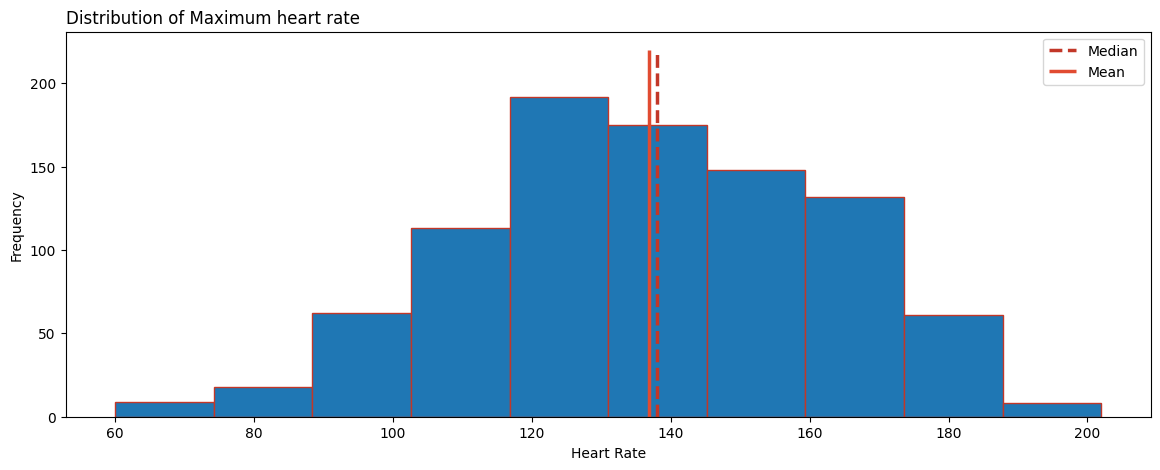

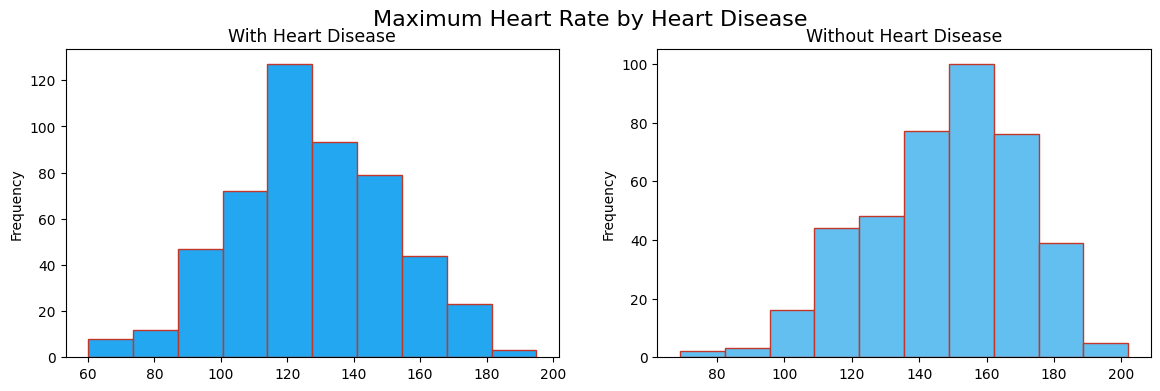

In [19]:
hr_median = df.MaxHR.median()
hr_mean = df.MaxHR.mean()

plt.figure(figsize=(14, 5))
plt.hist(df.MaxHR, ec=colors[-1])
plt.vlines(hr_median, ymin=0, ymax=220, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(hr_mean, ymin=0, ymax=220, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title("Distribution of Maximum heart rate", loc='left')
plt.legend()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = heart_disease['MaxHR'].plot(kind='hist', ax=axs[0], color=colors[1], ec=colors[-1])
ax1.set_title('With Heart Disease', size=12.5)

ax2 = without_heart_disease['MaxHR'].plot(kind='hist', ax=axs[1], color=colors[2], ec=colors[-1])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Maximum Heart Rate by Heart Disease', size=16, c='#000')
plt.show()

In [20]:
df.Oldpeak.describe().T

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

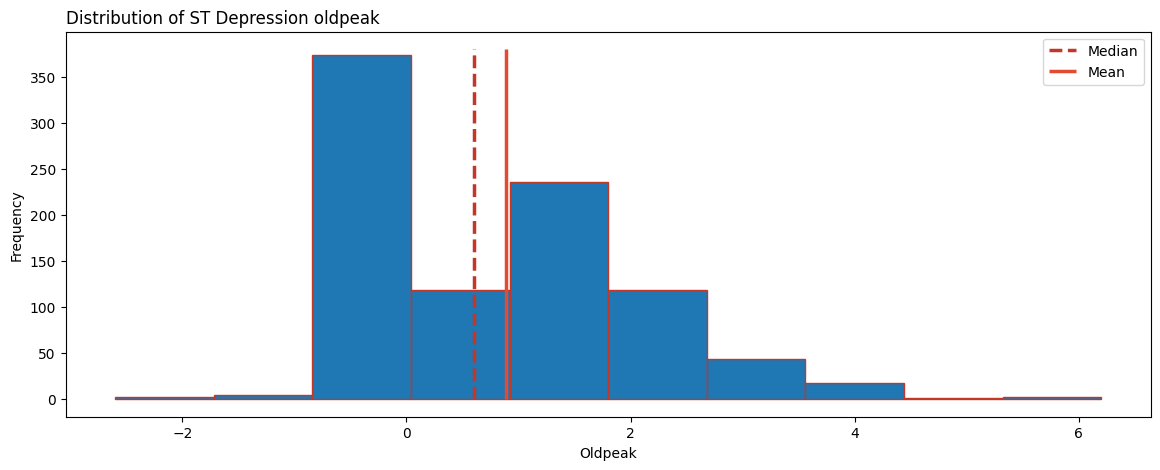

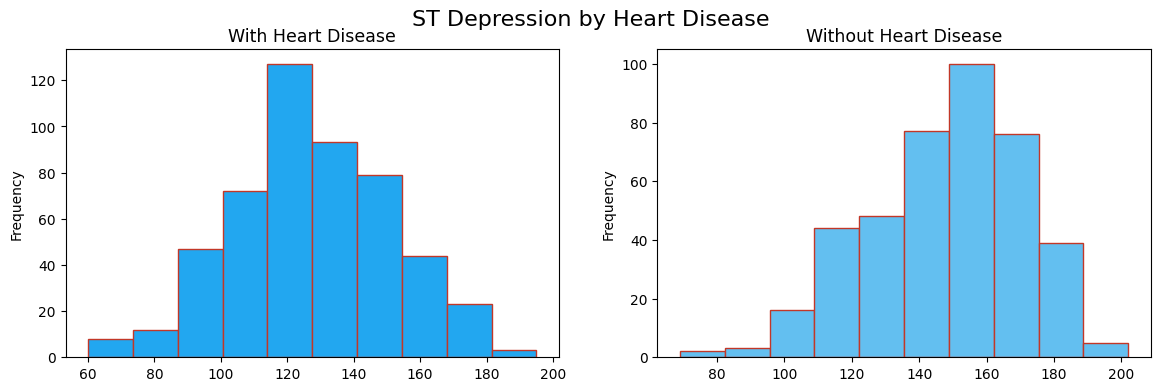

In [21]:
old_peak_median = df.Oldpeak.median()
old_peak_mean = df.Oldpeak.mean()

plt.figure(figsize=(14, 5))
plt.hist(df.Oldpeak, ec=colors[-1])
plt.vlines(old_peak_median, ymin=-0.1, ymax=380, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(old_peak_mean, ymin=0, ymax=380, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title("Distribution of ST Depression oldpeak", loc='left')
plt.legend()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = heart_disease['MaxHR'].plot(kind='hist', ax=axs[0], color=colors[1], ec=colors[-1])
ax1.set_title('With Heart Disease', size=12.5)

ax2 = without_heart_disease['MaxHR'].plot(kind='hist', ax=axs[1], color=colors[2], ec=colors[-1])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('ST Depression by Heart Disease', size=16, c='#000')
plt.show()

In [22]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

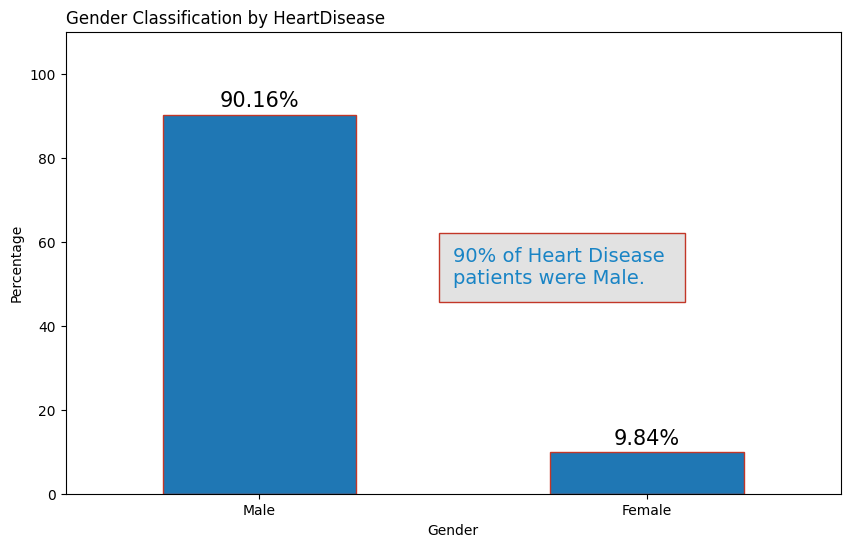

In [23]:
a = heart_disease.groupby('Sex').count()['Age'].sort_values(ascending=False)
a = (a / a.sum()) * 100
a.rename(index={'M': 'Male', 'F': 'Female'}, inplace=True)

a.plot(kind='bar', ec=colors[-1], figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Classification by HeartDisease', loc='left')

i = 0
for val in a.values:
    plt.text(i, val + 2, str(round(val, 2)) + '%', size=15, ha='center')
    i += 1

plt.text(0.5, 50, '90% of Heart Disease \npatients were Male. ', fontsize=14, color=colors[0],
         bbox={'pad': 10, 'fc': colors[4], 'ec': colors[-1]})

plt.ylim(0, 110)
plt.xticks(rotation=0)
plt.show()

In [24]:
heart_disease.groupby(['ChestPainType', 'Sex'])['HeartDisease'].count()

ChestPainType  Sex
ASY            F       39
               M      353
ATA            F        4
               M       20
NAP            F        6
               M       66
TA             F        1
               M       19
Name: HeartDisease, dtype: int64

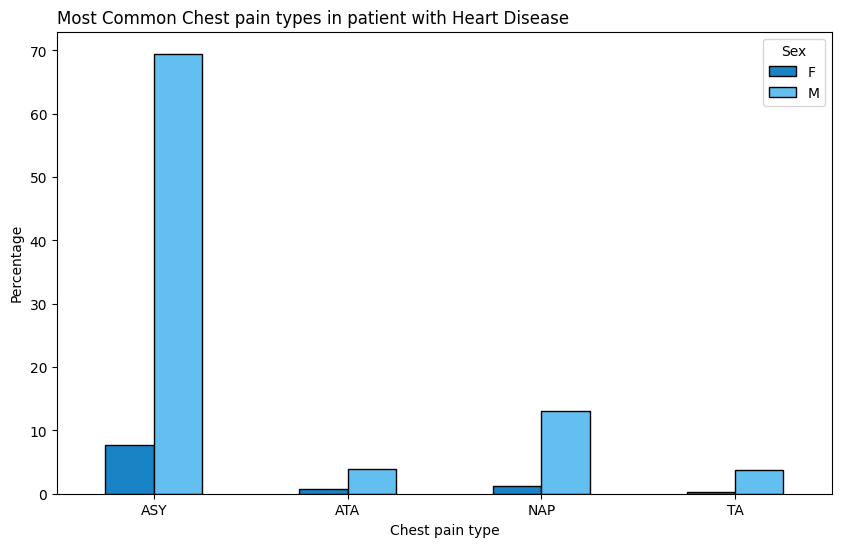

In [25]:
a = heart_disease.groupby(['ChestPainType', 'Sex'])['HeartDisease'].count()
a = (a / a.sum()) * 100

a.unstack().plot(kind='bar', ec='#000', color=colors[::2], figsize=(10, 6))

plt.xlabel('Chest pain type')
plt.ylabel('Percentage')
plt.title('Most Common Chest pain types in patient with Heart Disease', loc='left')

plt.xticks(rotation=0)
plt.show()

In [26]:
heart_disease.groupby(by=['RestingECG']).count()['Age']

RestingECG
LVH       106
Normal    285
ST        117
Name: Age, dtype: int64

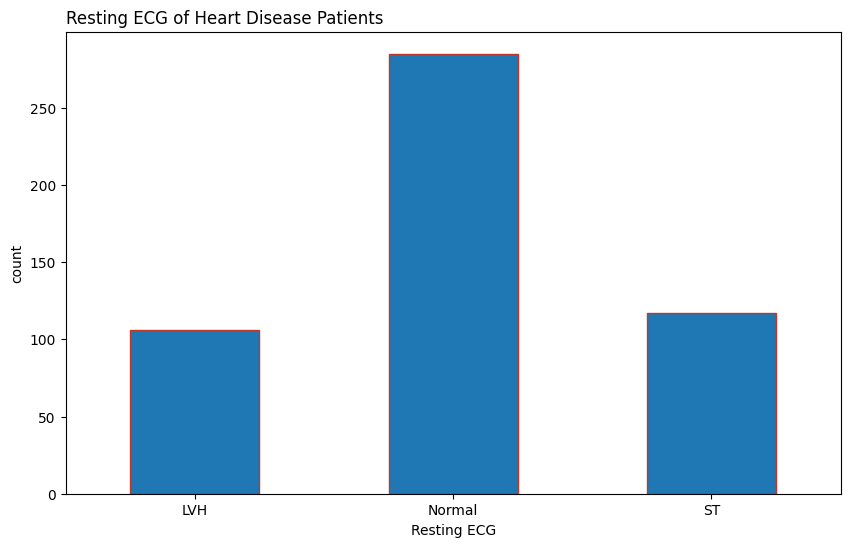

In [27]:
a = heart_disease.groupby(by=['RestingECG']).count()['Age']

a.plot(kind='bar', ec=colors[-1], figsize=(10, 6))

plt.xlabel('Resting ECG')
plt.ylabel('count')
plt.title('Resting ECG of Heart Disease Patients', loc='left')

plt.xticks(rotation=0)

plt.show()

In [28]:
df.groupby(by=['ST_Slope']).count()['Age']

ST_Slope
Down     63
Flat    460
Up      395
Name: Age, dtype: int64

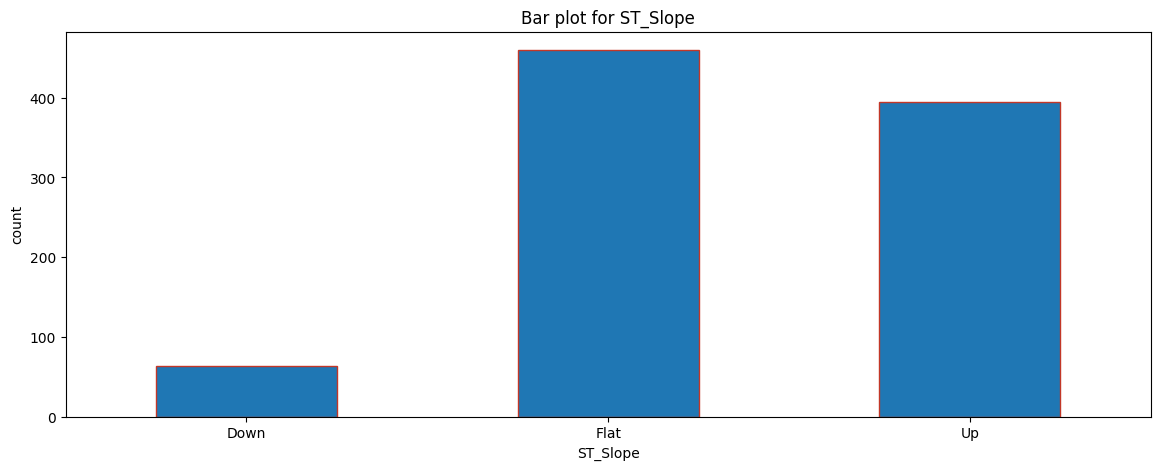

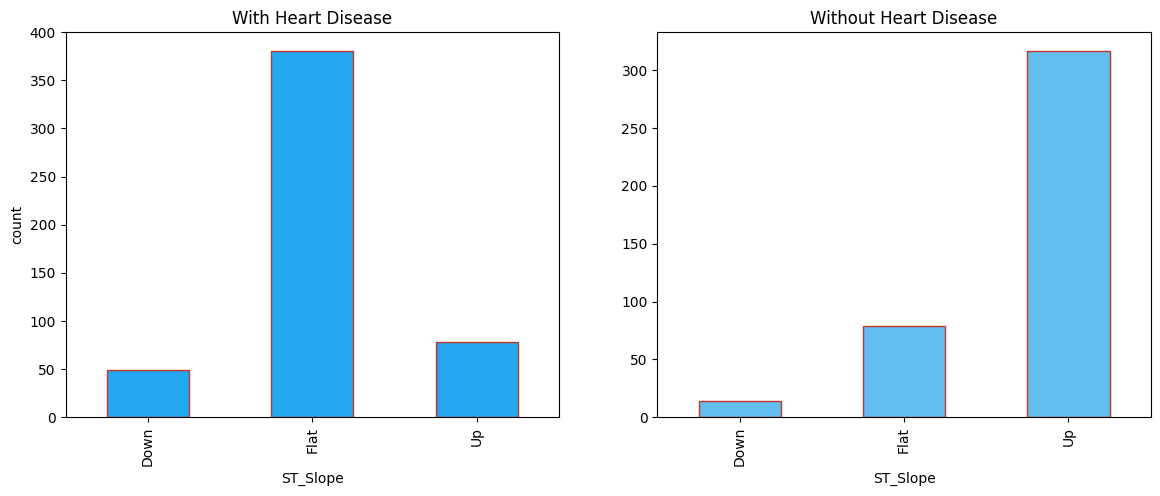

In [29]:
df.groupby(by=['ST_Slope']).count()['Age'].plot(kind='bar', figsize=(14, 5), ec=colors[-1])

plt.ylabel('count')
plt.title('Bar plot for ST_Slope')
plt.xticks(rotation=0)

# plot by heart disease
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
heart_disease.groupby(by=['ST_Slope']).count()['Age'].plot(kind='bar', ax=ax[0], ec=colors[-1], color=colors[1],
                                                           title="With Heart Disease", ylabel='count')
without_heart_disease.groupby(by=['ST_Slope']).count()['Age'].plot(kind='bar', ax=ax[1], ec=colors[-1], color=colors[2],
                                                                   title="Without Heart Disease")

plt.show()

In [30]:
df.groupby(by=['ExerciseAngina']).count()['Age']
#Y: Yes, N: No

ExerciseAngina
N    547
Y    371
Name: Age, dtype: int64

In [31]:
heart_disease.groupby(by=['ExerciseAngina']).count()['Age']

ExerciseAngina
N    192
Y    316
Name: Age, dtype: int64

In [32]:
without_heart_disease.groupby(by=['ExerciseAngina']).count()['Age']

ExerciseAngina
N    355
Y     55
Name: Age, dtype: int64

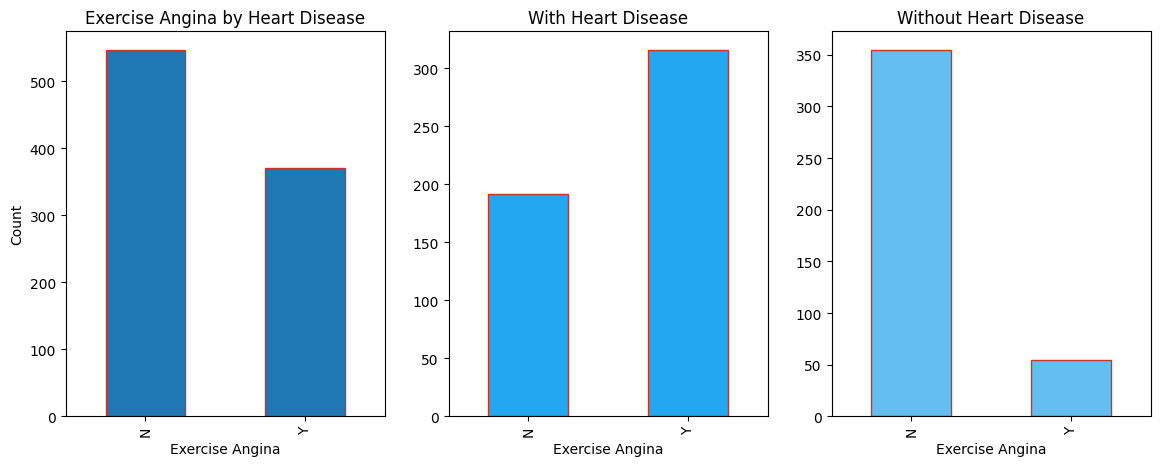

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
l = ['Count', 'Exercise Angina']
df.groupby(by=['ExerciseAngina']).count()['Age'].plot(kind='bar', ec=colors[-1], ax=ax[0],
                                                      title='Exercise Angina by Heart Disease', ylabel=l[0],
                                                      xlabel=l[1])
heart_disease.groupby(by=['ExerciseAngina']).count()['Age'].plot(kind='bar', ax=ax[1], ec=colors[-1], color=colors[1],
                                                                 title="With Heart Disease", xlabel=l[1])
without_heart_disease.groupby(by=['ExerciseAngina']).count()['Age'].plot(kind='bar', ax=ax[2], ec=colors[-1],
                                                                         color=colors[2], title="Without Heart Disease",
                                                                         xlabel=l[1])

plt.show()

#Y: Yes, N: No